# ⚠️ **Disclaimer**

*This is a simplified example provided solely for educational purposes. The analysis has not been optimized—for instance, missing values have not been addressed, and meaningful preprocessing steps have been omitted. As such, this should be viewed as a basic, incomplete, and potentially inaccurate illustration of the procurement process.*  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_auctions = pd.read_csv('../procurement_auction_data/Licitações.csv', encoding='cp1252', sep=';')
df_auctions.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,Objeto: Pregão Eletrônico - Contratação de emp...,Publicado,25000,Ministério da Fazenda,25000,Ministério da Fazenda - Unidades com víncul,RJ,CAMPOS DOS GOYTACAZES,02/01/2013,27/12/2012,"28296,0000"
1,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,Objeto: Pregão Eletrônico - Aquisição de órtes...,Evento de Alteração Publicad,33000,Ministério da Previdência Social,37202,Instituto Nacional do Seguro Social,RS,PASSO FUNDO,10/01/2013,14/12/2012,"166738,0000"
2,12012,580025,SUPERINT.FED.DE PESCA E AQUICULTURA/PB,5,Pregão,00365001949201230,Objeto: Pregão Eletrônico - Prestação de servi...,Evento de Retificação Divulg,58000,Ministério da Pesca e Aquicultura,58000,Ministério da Pesca e Aquicultura - Unidades,PB,CABEDELO,11/01/2013,19/12/2012,"60597,6000"
3,12013,925145,REGIONAL DE TRANSMISSÃO DO PARÁ,5,Pregão,1,Objeto: Pregão Eletrônico - Aquisição de termo...,Publicado,20101,Sem informação,91081,FURNAS-CENTRAIS ELETRICAS S.A.,-3,Inválido,28/01/2013,25/01/2013,"0,00"
4,12013,925150,TELECOMUNICAÇÕES BRASILEIRAS S.A.,5,Pregão,501/2012-TB,Objeto: Pregão Eletrônico - Contratação de emp...,Publicado,20000,PRESIDENCIA DA REPUBLICA - PRES,41000,MINISTERIO DAS COMUNICACOES - MINC,-3,Inválido,31/01/2013,18/01/2013,"65093,7900"


# 1. Analysis: Simplified Procurement Times in Brazilian Public Auctions

This analysis examines the time between auction opening and result publication
for different procurement items (Objetos) in Brazilian public procurement.

Important caveats:
1. The measured time (Data Resultado Compra - Data Abertura) represents only the auction process
2. It does not include:
   - Pre-auction planning and preparation
   - Post-auction contract execution
   - Logistics and delivery time
   - Administrative processing delays
3. Data Resultado Compra represents the publication date of results in the Official Gazette
4. Data Abertura represents the opening date for proposal submissions

The analysis will show:
- Average procurement times by procurement item
- Top 10 items with longest processing times
- Visual representation of procurement times

Mapping of procurement items:
A -> Objeto: Pregão Eletrônico - O objeto desta licitação é a contratação do serviço de Lançamento de Cabeamento para instalação de 19 (dezenove) pontos de monitoramento, com canaletas e tubulações com fornecimento de material, com execução mediante o regime de empreitada por preço global, visando atender às necessidades do CELOG, conforme especificações e quantitativos estabelecidos no Termo de Referência e neste Edital e seus Anexos
B -> Objeto: Pregão Eletrônico - O objeto desta licitação é a contratação do serviço de 240 (duzentas e quarenta) horas de treinamento de voo em rota em aeronave AIRBUS 319/320, com execução mediante o regime de empreitada por preço global, visando atender às necessidades do Comando da Aeronáutica.
C -> Objeto: Pregão Eletrônico - Fornecimento e instalação de carpete em Auditório deste Centro de Instrução.
D -> Objeto: Pregão Eletrônico - Contratação de empresa de pequeno porte ou microempresa, em regime de empreitada por pre

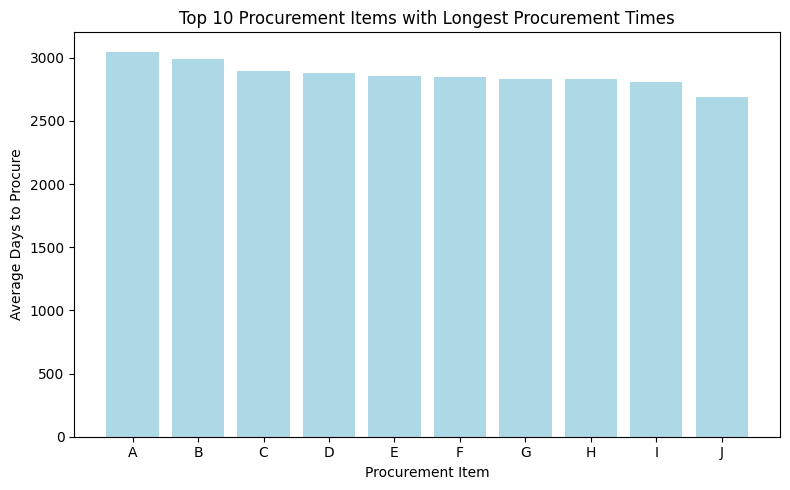

In [3]:
# Convert date columns to datetime
df_auctions['Data Resultado Compra'] = pd.to_datetime(df_auctions['Data Resultado Compra'], format='%d/%m/%Y')
df_auctions['Data Abertura'] = pd.to_datetime(df_auctions['Data Abertura'], format='%d/%m/%Y')

# Calculate time to procure (in days) and ensure it's positive
df_auctions['Time to Procure'] = (df_auctions['Data Resultado Compra'] - df_auctions['Data Abertura']).dt.days
df_auctions['Time to Procure'] = df_auctions['Time to Procure'].abs()  # Convert negative values to positive

# Group by management unit and calculate average time to procure
time_by_unit = df_auctions.groupby('Objeto')['Time to Procure'].mean().sort_values(ascending=False)

# Create mapping for top 10 items
top_10_items = time_by_unit.head(10)
mapping = {chr(65 + i): item for i, item in enumerate(top_10_items.index)}
reverse_mapping = {item: key for key, item in mapping.items()}

# Print the mapping
print("Mapping of procurement items:")
for key, value in mapping.items():
    print(f"{key} -> {value}")

# Minimalistic plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(top_10_items)), top_10_items.values, color='lightblue')
plt.xticks(range(len(top_10_items)), [reverse_mapping[item] for item in top_10_items.index])
plt.ylabel('Average Days to Procure')
plt.xlabel('Procurement Item')
plt.title('Top 10 Procurement Items with Longest Procurement Times')
plt.tight_layout()
plt.show()